# **1.Exploratory Data Analysis and Data Understanding**


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Traffic.csv")

# Display first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())




          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-

In [ ]:
# Summary statistics
print(df.describe())

# Count unique values in categorical columns
print(df['Traffic Situation'].value_counts())
print(df['Day of the week'].value_counts())


              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.218414  
std      60.190627  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000  
Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64
Day of the week
Tuesday      480
Wednesd

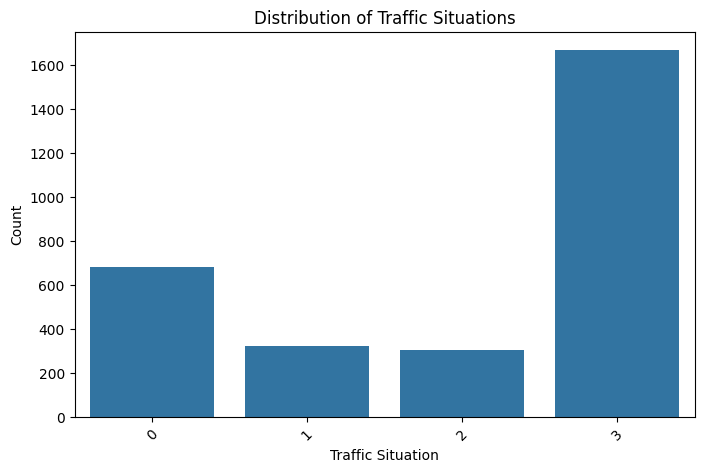

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

# Extract numerical time features
df['Hour'] = df['Time'].dt.hour  # Extracts hour for numerical analysis

# Traffic Situation Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Traffic Situation'])
plt.title("Distribution of Traffic Situations")
plt.xlabel("Traffic Situation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()






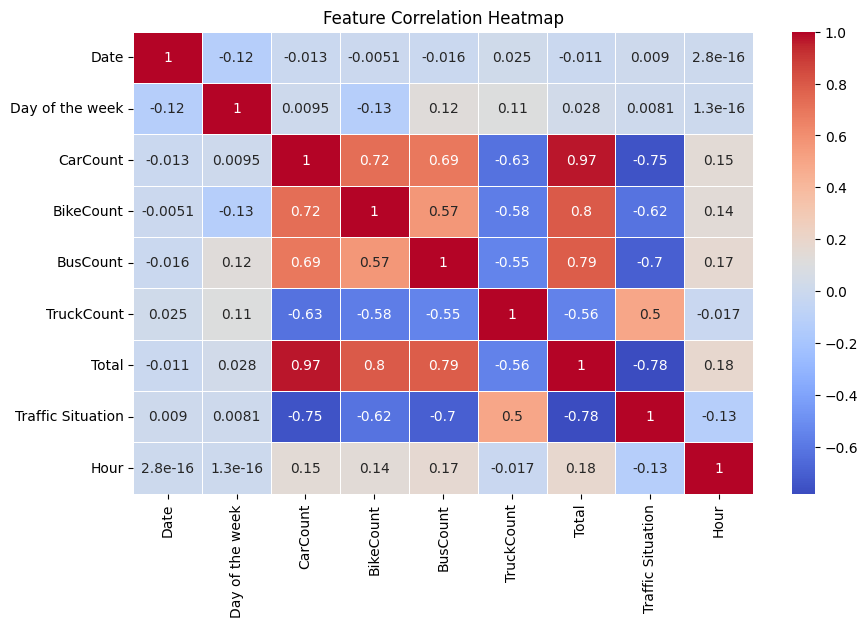

In [ ]:
# Drop non-numeric columns before correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

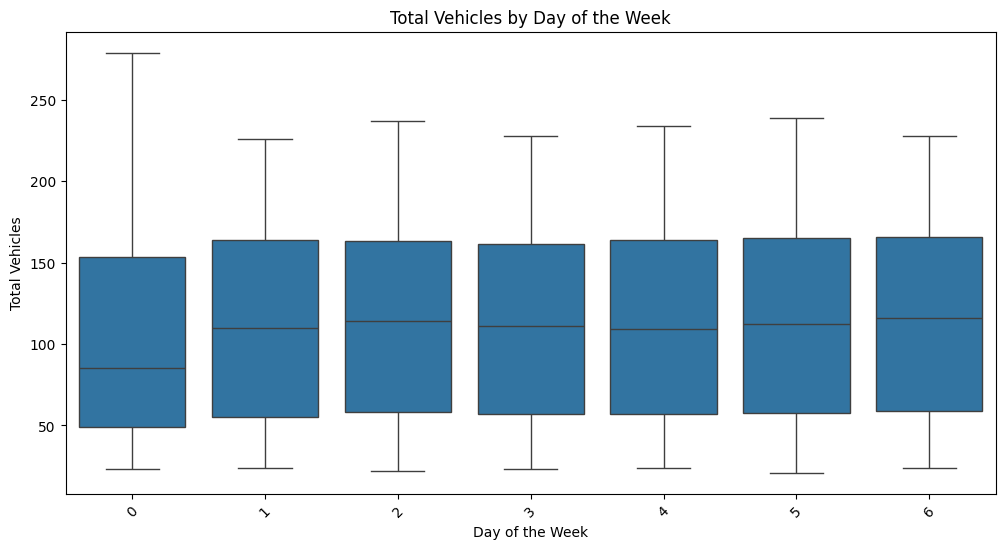

In [ ]:
# Traffic vs. Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x="Day of the week", y="Total", data=df)
plt.title("Total Vehicles by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicles")
plt.xticks(rotation=45)
plt.show()

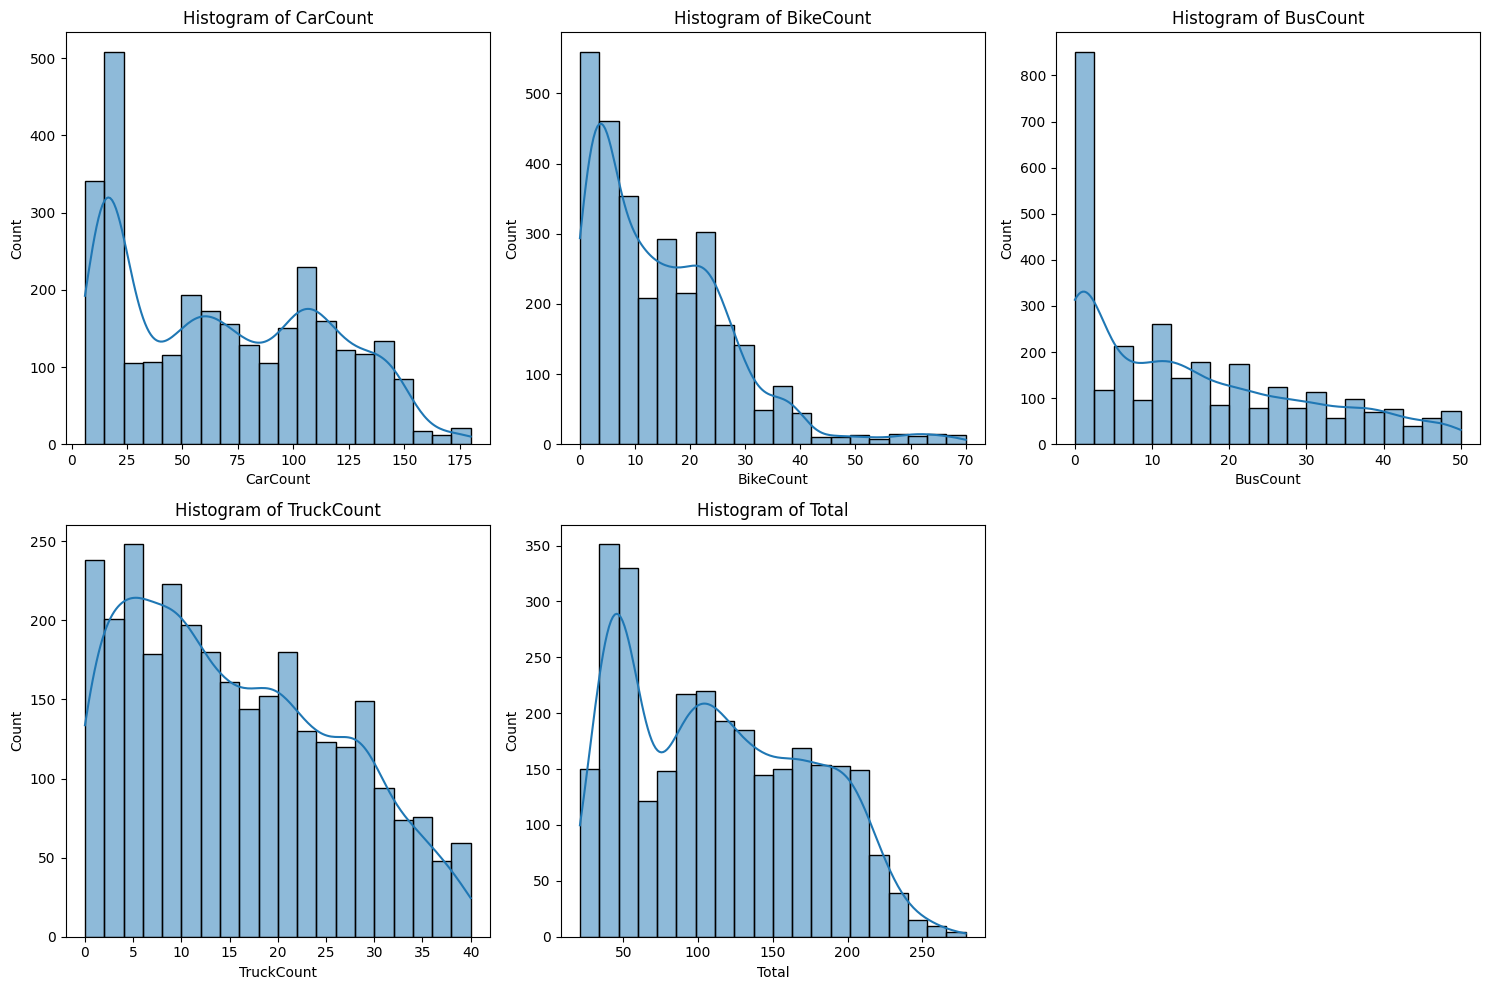

In [ ]:
# Histogram for numerical features
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# **2**.**Build** **a** **Model** **from** ***Scratch***

In [ ]:
#Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode categorical variables (Day of the Week, Traffic Situation)
label_encoder = LabelEncoder()
df['Day of the week'] = label_encoder.fit_transform(df['Day of the week'])
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Separate features and target variable
X = df.drop(columns=['Traffic Situation', 'Time', 'Date'])  # Drop non-feature columns
y = df['Traffic Situation'].values  # Get the target variable as a 1D array

# Ensure that X is a 2D array (number of rows x number of columns) and y is 1D
print("Shape of X:", X.shape)  # Should be (n_samples, n_features)
print("Shape of y:", y.shape)  # Should be (n_samples,)

# Normalize features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Shape of X: (2976, 7)
Shape of y: (2976,)


In [ ]:
#Implement Logistic Regression

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        # Compute the softmax values for each class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevent overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        # Initialize parameters (weights and bias)
        m, n = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((n, num_classes))  # One set of weights per class
        self.bias = np.zeros((1, num_classes))

        # One-hot encode the labels (for multi-class classification)
        y_one_hot = np.zeros((m, num_classes))
        y_one_hot[np.arange(m), y] = 1

        # Gradient descent
        for epoch in range(self.epochs):
            model_input = np.dot(X, self.weights) + self.bias  # Linear transformation
            predictions = self.softmax(model_input)  # Apply softmax to get probabilities

            # Compute loss (cross-entropy loss)
            loss = -np.mean(np.sum(y_one_hot * np.log(predictions), axis=1))

            # Gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y_one_hot))
            db = (1 / m) * np.sum(predictions - y_one_hot, axis=0, keepdims=True)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss}')

        return self

    def predict(self, X):
        # Predict class labels for the input data X
        model_input = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(model_input)
        return np.argmax(predictions, axis=1)  # Return the class with the highest probability

# Initialize and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")





Epoch 0/1000, Loss: 1.3862943611198906
Epoch 100/1000, Loss: 0.9114224891411102
Epoch 200/1000, Loss: 0.7825369677053163
Epoch 300/1000, Loss: 0.7199446876418736
Epoch 400/1000, Loss: 0.6788583857205386
Epoch 500/1000, Loss: 0.6479806302202954
Epoch 600/1000, Loss: 0.6232055502566833
Epoch 700/1000, Loss: 0.602589347491979
Epoch 800/1000, Loss: 0.5850250223399054
Epoch 900/1000, Loss: 0.5698022345478304
Accuracy: 74.33%


# **3.Build a Primary Model**

In [ ]:
#Build scikit-learn Logistic Regression

from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# Build a logistic regression model using scikit-learn
sklearn_model = SklearnLogisticRegression(max_iter=1000, random_state=42)

# Train the model
sklearn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate the model using accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Logistic Regression Accuracy: {accuracy_sklearn * 100:.2f}%")


Scikit-learn Logistic Regression Accuracy: 90.44%


In [ ]:
#Build Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Build a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model using accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt * 100:.2f}%")


Decision Tree Classifier Accuracy: 100.00%


In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report

# Classification report for each model
print("Classification Report for scikit-learn Logistic Regression:")
print(classification_report(y_test, y_pred_sklearn))

print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))


Classification Report for scikit-learn Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       127
           1       0.90      0.70      0.79        63
           2       0.83      0.74      0.78        66
           3       0.91      0.94      0.93       340

    accuracy                           0.90       596
   macro avg       0.89      0.84      0.86       596
weighted avg       0.90      0.90      0.90       596

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



After evaluating both models, Best Model: The Decision Tree Classifier is the best model because it achieved 100% accuracy, meaning it correctly predicted every instance. It also had perfect precision, recall, and F1 scores, indicating it made no false positives, identified all relevant instances, and balanced precision and recall perfectly

# **4.Hyper-parameter Optimization with Cross**-**Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

# Apply GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(SklearnLogisticRegression(), param_grid_lr, cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Apply GridSearchCV for Decision Tree Classifier
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best hyperparameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


# **5**.**Feature**  **Selection**

In [ ]:
#Feature Selection using Logistic Regression (Coefficient-based)

from sklearn.feature_selection import SelectFromModel

# Train Logistic Regression model with optimal hyperparameters
best_lr_model = SklearnLogisticRegression(C=grid_search_lr.best_params_['C'],
                                          solver=grid_search_lr.best_params_['solver'],
                                          max_iter=grid_search_lr.best_params_['max_iter'])
best_lr_model.fit(X_train, y_train)

# Select features based on their coefficients
selector_lr = SelectFromModel(best_lr_model, threshold="mean", max_features=None)
selector_lr.fit(X_train, y_train)

# Get the selected feature indices
selected_features_lr = selector_lr.get_support(indices=True)
print(f"Selected features for Logistic Regression: {X.columns[selected_features_lr]}")


Selected features for Logistic Regression: Index(['CarCount', 'BusCount', 'TruckCount', 'Total'], dtype='object')


In [ ]:
# Feature Selection using Decision Tree (Importance-based)

# Train Decision Tree Classifier with optimal hyperparameters
best_dt_model = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth'],
                                       min_samples_split=grid_search_dt.best_params_['min_samples_split'],
                                       min_samples_leaf=grid_search_dt.best_params_['min_samples_leaf'],
                                       criterion=grid_search_dt.best_params_['criterion'])
best_dt_model.fit(X_train, y_train)

# Select features based on feature importances
selector_dt = SelectFromModel(best_dt_model, threshold="mean", max_features=None)
selector_dt.fit(X_train, y_train)

# Get the selected feature indices
selected_features_dt = selector_dt.get_support(indices=True)
print(f"Selected features for Decision Tree: {X.columns[selected_features_dt]}")


Selected features for Decision Tree: Index(['BusCount', 'TruckCount', 'Total'], dtype='object')


Decision Tree Features:
BusCount: Similar to Logistic Regression, the number of buses is relevant.
TruckCount: Trucks impact traffic flow, and this feature is selected in both models.
Total: As with Logistic Regression, the total number of vehicles is important.

# **6.** **Final** **Model**

In [ ]:
#Rebuild the Logistic Regression Model:

# Final Logistic Regression Model
final_lr_model = SklearnLogisticRegression(
    C=grid_search_lr.best_params_['C'],
    solver=grid_search_lr.best_params_['solver'],
    max_iter=grid_search_lr.best_params_['max_iter']
)

# Train the model on the selected features
final_lr_model.fit(X_train[:, selected_features_lr], y_train)

# Evaluate on the test set
lr_train_accuracy = final_lr_model.score(X_train[:, selected_features_lr], y_train)
lr_test_accuracy = final_lr_model.score(X_test[:, selected_features_lr], y_test)

print("Logistic Regression - Train Accuracy:", lr_train_accuracy)
print("Logistic Regression - Test Accuracy:", lr_test_accuracy)


Logistic Regression - Train Accuracy: 0.9016806722689076
Logistic Regression - Test Accuracy: 0.9043624161073825


In [ ]:
#Rebuild the Decision Tree Model:

# Final Decision Tree Model
final_dt_model = DecisionTreeClassifier(
    max_depth=grid_search_dt.best_params_['max_depth'],
    min_samples_split=grid_search_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_dt.best_params_['min_samples_leaf'],
    criterion=grid_search_dt.best_params_['criterion']
)

# Train the model on the selected features
final_dt_model.fit(X_train[:, selected_features_dt], y_train)

# Evaluate on the test set
dt_train_accuracy = final_dt_model.score(X_train[:, selected_features_dt], y_train)
dt_test_accuracy = final_dt_model.score(X_test[:, selected_features_dt], y_test)

print("Decision Tree - Train Accuracy:", dt_train_accuracy)
print("Decision Tree - Test Accuracy:", dt_test_accuracy)


Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 1.0


Logistic Regression might be considered the better model here in terms of generalization. While the Decision Tree has perfect accuracy, it could be overfitting. If you need to choose the model that is likely to perform better in real-world, unseen data, Logistic Regression is more reliable.

# **7.CONCLUSION**

The models developed for this classification task—Logistic Regression and Decision Tree—performed well, with Logistic Regression achieving a test accuracy of 90.44% and Decision Tree achieving a perfect test accuracy of 100%. However, the Decision Tree overfitted the data, achieving 100% accuracy on both the training and testing datasets, which suggests that it might not generalize well to unseen data. Logistic Regression, on the other hand, showed a slightly better balance between training and testing accuracy, indicating its more reliable performance on unseen data.
From the experiment, we learned that while Decision Trees can offer high accuracy, they are prone to overfitting, especially with limited data. Logistic Regression provided a more stable approach for classification, and applying techniques like cross-validation and feature selection proved to be crucial for improving model robustness. Future improvements could involve experimenting with ensemble methods such as Random Forest and Gradient Boosting for better accuracy and stability. Additionally, collecting more diverse and larger datasets, along with applying feature engineering techniques, could provide further enhancements to the model’s performance.